# <span style="color:red"> MS2Planner notebook for IODA </span>

**Purpose**: The IODA MSPlanner workflow runs MS2Planner for iterative optimise data acquisition (IODA) of fragmentation spectra in LC-MS. It accepts as input *EITHER*:
 1) A pair of `mzML` or `RAW` files ("blank" sample, "reference" sample) [EASIEST]. It will be used for feature detection and alignement with pyOpenMS to generate an mzTab that will be used for MS2Planner.
 2) A `mzTab` file or an `MZmine feature table` along with a `mzML` file for the sample (Curve mode).
    
The targets are retrived from the "reference" sample, and background ions are detected in the "blank" sample. Background ions are excluded from the targets. The targets can be acquired by IODA in one or multiple experiments for higher coverage with for XCalibur or [MaxQuant.Live](http://www.maxquant.live/).

**Documentation**: Please refer to the documentation page [See here NOT YET AVAILABLE](link).

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

<!--These are various test jobs 
from importlib import reload
import IODA_MS2Planner_workflow
reload(IODA_MS2Planner_workflow)
from IODA_MS2Planner_workflow import *


#input_file = 'tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab'
#input_file = 'tests/MZmine3/Targeted/MZmine_3_test_quant.csv'
#input_file = 'tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1_to_SA113_SPE_MeOH_MS1_mrgd.mzTab'
-->


### Step 0 - Run your LC-MS mass spectrometry experiments

Analyse your "reference" and "blank" samples by LC-MS.

<span style="color:brown">**IMPORTANT**</span>: The chromatographic and mass spectrometry conditions must be identical for all the samples analyzed with IODA. Make sure the chromatographic system was well equilibrated and is stable. Note that there is no need for MS/MS acquisition for the reference and blank, as feature detection/alignment with pyOpenMS is performed only on the MS1 level. The following IODA-targeted experiments requires MS/MS acquisition.

### Step 1 - Upload the files to the workspace

Upload your mzML/RAW files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

#### Step 2 - Load the functions by running the cell below


In [1]:
import sys
sys.path.append('src')
from IPython.display import Image
import glob
from IODA_MS2Planner_workflow import *
from IODA_run_pyOpenMS_targeted import *

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


## A) Starting from a pair of mzML/RAW files

Upload your mzML files to the workspace and specify the path to use for the blank and reference samples.

In [2]:
input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"
input_BLANK = "Blank_ICOA_neg_MS1.mzML"
input_SAMPLE = "DAM1_2mgml_neg_1uL_MS1.mzML"
input_BLANK = "MeOH_pos_C1_MS1.mzML"
input_SAMPLE = "QCMixUNIGE_dil1for5_pos_1uL_MS1.mzML"
input_BLANK = "Blank_desalting_pos_1uL_optLC_MS1.mzML"
input_SAMPLE = "MC_MT_A8_1105_1mgmL_pos_1uL_optLC_MS1.mzML"
input_SAMPLE = "fullscan_beer1_0.mzML"
input_BLANK = "fullscan_beer1_0_pseudoblank.mzML"
input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"
input_BLANK = "Beer_multibeers_1_fullscan1.mzML"
input_SAMPLE = "Beer_multibeers_1_fullscan1_placeholder.mzML"
input_SAMPLE = "fullscan_beer1_0.mzML"
input_BLANK = "fullscan_beer1_0_pseudoblank.mzML"
input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"

### Set the variables for the pyOpenMS feature detection and alignement

**Specify the variables of the pyOpenMS processing**

Parameters should be optimised depending on the sample complexity and acquisition parameters. You can visualize the data of your mzML file with OpenMS/TOPPView to decide upon the best noise level, see the [documentation](documentation.ipynb).

The OpenMS workflow uses the Feature Finder Metabolomics (FFM) tool to detect LC-MS features/peaks. The parameters below are for the FFM tool. The minimum peak height for detected feature is set to 3 fold the noise level set.

##### Maximum mass error
> `ppm_error`: the maximum mass error allowed for the feature detection. A value of 10 ppm is recommended for a resolution of 35K or less (must be an integer/float).

##### Noise level
> `noise_level`: this is the MS1 noise level for the detection of narrow LC-MS features. The default value is 1E5 (must be an integer/float, can be in scientific format). 

TIPS: If your sample has a lot of features, increase the noise levels to limit the number of ions that are detected for subsequent exclusion.

In [4]:
ppm_error = 3
noise_level = 5E4
chrom_peak_snr = 2
elements_alphabet = 'CHNOPS' #'CHNOPSClBr'
polarity = 'Positive'

In [5]:
IODA_targeted_workflow(input_BLANK, input_SAMPLE, ppm_error, noise_level, chrom_peak_snr, elements_alphabet)
input_file = glob.glob('OpenMS_workflow/OpenMS_output/*MS2Planner.csv')[0]
input_file_curve = input_SAMPLE

mkdir: download_results: File exists
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:41] 2023-08-21 17:31:45.608444
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:42] STARTING the IODA-targeted WORKFLOW
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:43] ======
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:44] Path to the input files: 
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:45] Blank: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:46] Sample: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:128] Copying the mzML files ...
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:58] 2023-08-21 17:31:45.611808
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:59] STARTING the IODA-targeted WORKFLOW with OpenMS
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:60] ======
[I 230821 17:31:45 IODA_run_pyOpenMS_targeted:61] Getting the mzML, please wait ..

Mass Trace Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Elution Peak Detection: Progress of 'mass trace detection':
-- done [took 32.10 s (CPU), 32.09 s (Wall)] -- 
 OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Progress of 'elution peak detection':
-- done [took 0.24 s (CPU), 0.25 s (Wall)] -- 
Feature Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Progress of 'assembling mass traces to features':
-- done [took 0.00 s (CPU), 0.00 s (Wall)] -- 
Mass Trace Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
Progress of 'mass trace detection':
Elution Peak Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
-- done [took 2.61 s (CPU), 2.60 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 2.37 s (CPU), 2.36 s (Wall)] -- 
Feature Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
Pro

[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:368] ======
[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:369] Completed the OpenMS workflow
[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:370] ======
[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:371] Zipping up the OpenMS workflow results ..
[I 230821 17:32:24 IODA_exclusion_workflow:97] All files zipped successfully!
[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:374] ======


Progress of 'computing RT transformations':
-- done [took 0.02 s (CPU), 0.03 s (Wall)] -- 
Progress of 'linking features':
-- done [took 0.07 s (CPU), 0.06 s (Wall)] -- 


[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:375] Completed zipping up the OpenMS workflow result files
[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:377] ======
[I 230821 17:32:24 IODA_run_pyOpenMS_targeted:378] NOW CONTINUE WITH THE REST OF THE IODA-targeted WORKFLOW


## B) Continue or start with a MZmine3 feature table or an mzTab
If you ran the cell above to do OpenMS processing, you can just run the following cell without changing anything.

Otherwise, upload either an `mzTab` file or the `MZmine feature table` along with the `mzML`/`RAW` file and specify the paths to use:

In [6]:
## OpenMS processing
input_file = glob.glob('OpenMS_workflow/OpenMS_output/*MS2Planner.csv')[0]
input_file_curve = input_SAMPLE

## MZmine3 processing (not MZmine2)
#input_file = 'tests/MZmine3/Targeted/MZmine_3_test_quant.csv'
#input_file_curve = 'tests/MZmine3/Targeted/20230146_LFX_EG_POS_qc-mix_1.mzML'

## MS2Planner native file (the input file table must ends with 'MS2Planner.csv' to be recognized)
#input_file = 'tests/Beer/multibeers_1_6_mzmine_aligned_MS2Planner.csv'
#input_file_curve = 'tests/Beer/fullscan_beer1_0.mzML'

## Third party processing
#input_file = 'tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1_to_SA113_SPE_MeOH_MS1_mrgd.mzTab'
#input_file_curve = 'tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1.mzML'

## Prepare MS2Planner parameters

In [7]:
# Feature table filtering parameters (pre-MS2Planner step) 
max_same_RT = 3 #default 5

# MS2Planner shared parameters
min_ratio_value = 0
min_intensity_value = 1E4 # 1E5 
experiment_number = 2
isolation = 1.2  # Value will not be used for Curve mode
delay = 0.025 #sec
transient_time = 35 #ms  #35 ms on Exploris 120 for 15K
 
# Parameters only considered to generate the final target list
rt_margin = 0.1 #sec
apex_int_percent = 0.5          # For Exploris serie, ratio of the apex to be defined as MS2 trigger intensity - only for 'int' output tables.
pretarget_rt_margin = 0.1       # Decrease the rt_start for the target by this value (secs)
posttarget_rt_margin = 0.2      # Optional

# Exploris only and optional
RF_base_value=70
CEs = '15,30,45'                # One or multiple CE '35' or '15,30,45' for example
min_AGC=100                     # in ms
max_AGC=250                     # in ms

# Baseline mode

### Prepare Baseline mode parameters

In [8]:
# MS2Planner - Baseline parameter
win_len = 0.2   #seconds
#max_same_RT = 5 #default 3

### Run MS2Planner in Baseline mode


In [9]:
# Run Path Finder with Baseline method 
MS2Planner_baseline(
    input_file, experiment_number, min_ratio_value, min_intensity_value, 
    win_len, isolation, delay, rt_margin, 
    max_same_RT, transient_time,
    polarity, apex_int_percent = apex_int_percent,
    pretarget_rt_margin = pretarget_rt_margin, posttarget_rt_margin = posttarget_rt_margin,
    RF_base_value=RF_base_value, CEs=CEs,
    min_AGC=min_AGC, max_AGC=max_AGC
    )


[I 230821 17:32:24 IODA_MS2Planner_workflow:324] STARTING THE MS2Planner WORKFLOW
[I 230821 17:32:24 IODA_MS2Planner_workflow:329] File path to a MZmine3 feature table was specified by the user
[I 230821 17:32:24 IODA_MS2Planner_workflow:344] 2023-08-21 17:32:24.741468
[I 230821 17:32:24 IODA_MS2Planner_workflow:346] ======
[I 230821 17:32:24 IODA_MS2Planner_workflow:347] Getting the mzTab
[I 230821 17:32:24 IODA_MS2Planner_workflow:364] This is the input file path: OpenMS_workflow/OpenMS_output/consensus_MS2Planner.csv
[I 230821 17:32:24 IODA_MS2Planner_workflow:365] This is the output file path: results_targeted_MS2Planner_baseline/consensus_MS2Planner.csv
[I 230821 17:32:24 IODA_MS2Planner_workflow:374] ======
[I 230821 17:32:24 IODA_MS2Planner_workflow:375] Converting to intermediate table format ...
[I 230821 17:32:24 IODA_MS2Planner_workflow:123] - For sample Euphorbia_rogers_latex_Blank_MS1_2uL.mzML, the sum of feature intensities = 6.85e+08
[I 230821 17:32:24 IODA_MS2Planner_wo

[I 230821 17:32:24 IODA_MS2Planner_workflow:377] ======
[I 230821 17:32:24 IODA_MS2Planner_workflow:382] Assumed sample filename: Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 230821 17:32:24 IODA_MS2Planner_workflow:384] Assumed blank filename: Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230821 17:32:24 IODA_MS2Planner_workflow:385] ======
[I 230821 17:32:24 IODA_MS2Planner_workflow:388] = PARAMETERS ==
[I 230821 17:32:24 IODA_MS2Planner_workflow:389]  
[I 230821 17:32:24 IODA_MS2Planner_workflow:390] == MS2Planner parameters
[I 230821 17:32:24 IODA_MS2Planner_workflow:392]     Ratio between sample/blank for ion filtering = 0
[I 230821 17:32:24 IODA_MS2Planner_workflow:394]     Minimum intensity for ion filtering in sample = 1.00e+04
[I 230821 17:32:24 IODA_MS2Planner_workflow:395]     Retention time window (secs) for binning target ions = 0.2
[I 230821 17:32:24 IODA_MS2Planner_workflow:396]     Isolation window (m/z) = 1.2
[I 230821 17:32:24 IODA_MS2Planner_workflow:397]     Transien

Input file is a consensus table from pyOpenMS or provided file


[I 230821 17:32:25 IODA_MS2Planner_workflow:439] ======
[I 230821 17:32:25 IODA_MS2Planner_workflow:443] 2023-08-21 17:32:25,313 - MS2Planner - INFO - =============
    2023-08-21 17:32:25,313 - MS2Planner - INFO - Baseline mode begin
    2023-08-21 17:32:25,313 - MS2Planner - INFO - =============
    2023-08-21 17:32:25,313 - MS2Planner - INFO - File Read
    2023-08-21 17:32:25,313 - MS2Planner - INFO - =============
    2023-08-21 17:32:25,314 - MS2Planner.baseline - INFO -    Initial number of features = 6188
    2023-08-21 17:32:25,317 - MS2Planner.baseline - INFO -    Remaining features = 6188 after same RT filtering with top 3
    2023-08-21 17:32:25,317 - MS2Planner - INFO - Begin Finding Path
    2023-08-21 17:32:25,317 - MS2Planner - INFO - =============
    2023-08-21 17:32:25,365 - MS2Planner.baseline - INFO - Total number of features: 6189
    2023-08-21 17:32:25,365 - MS2Planner.baseline - INFO - Maximum number of iterative experiments: 2
    2023-08-21 17:32:25,365 - MS2

### Visualization - **Baseline mode results**

### Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the feature detection parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the feature table or the mzTab file (such as with TOPPAS/OpenMS).

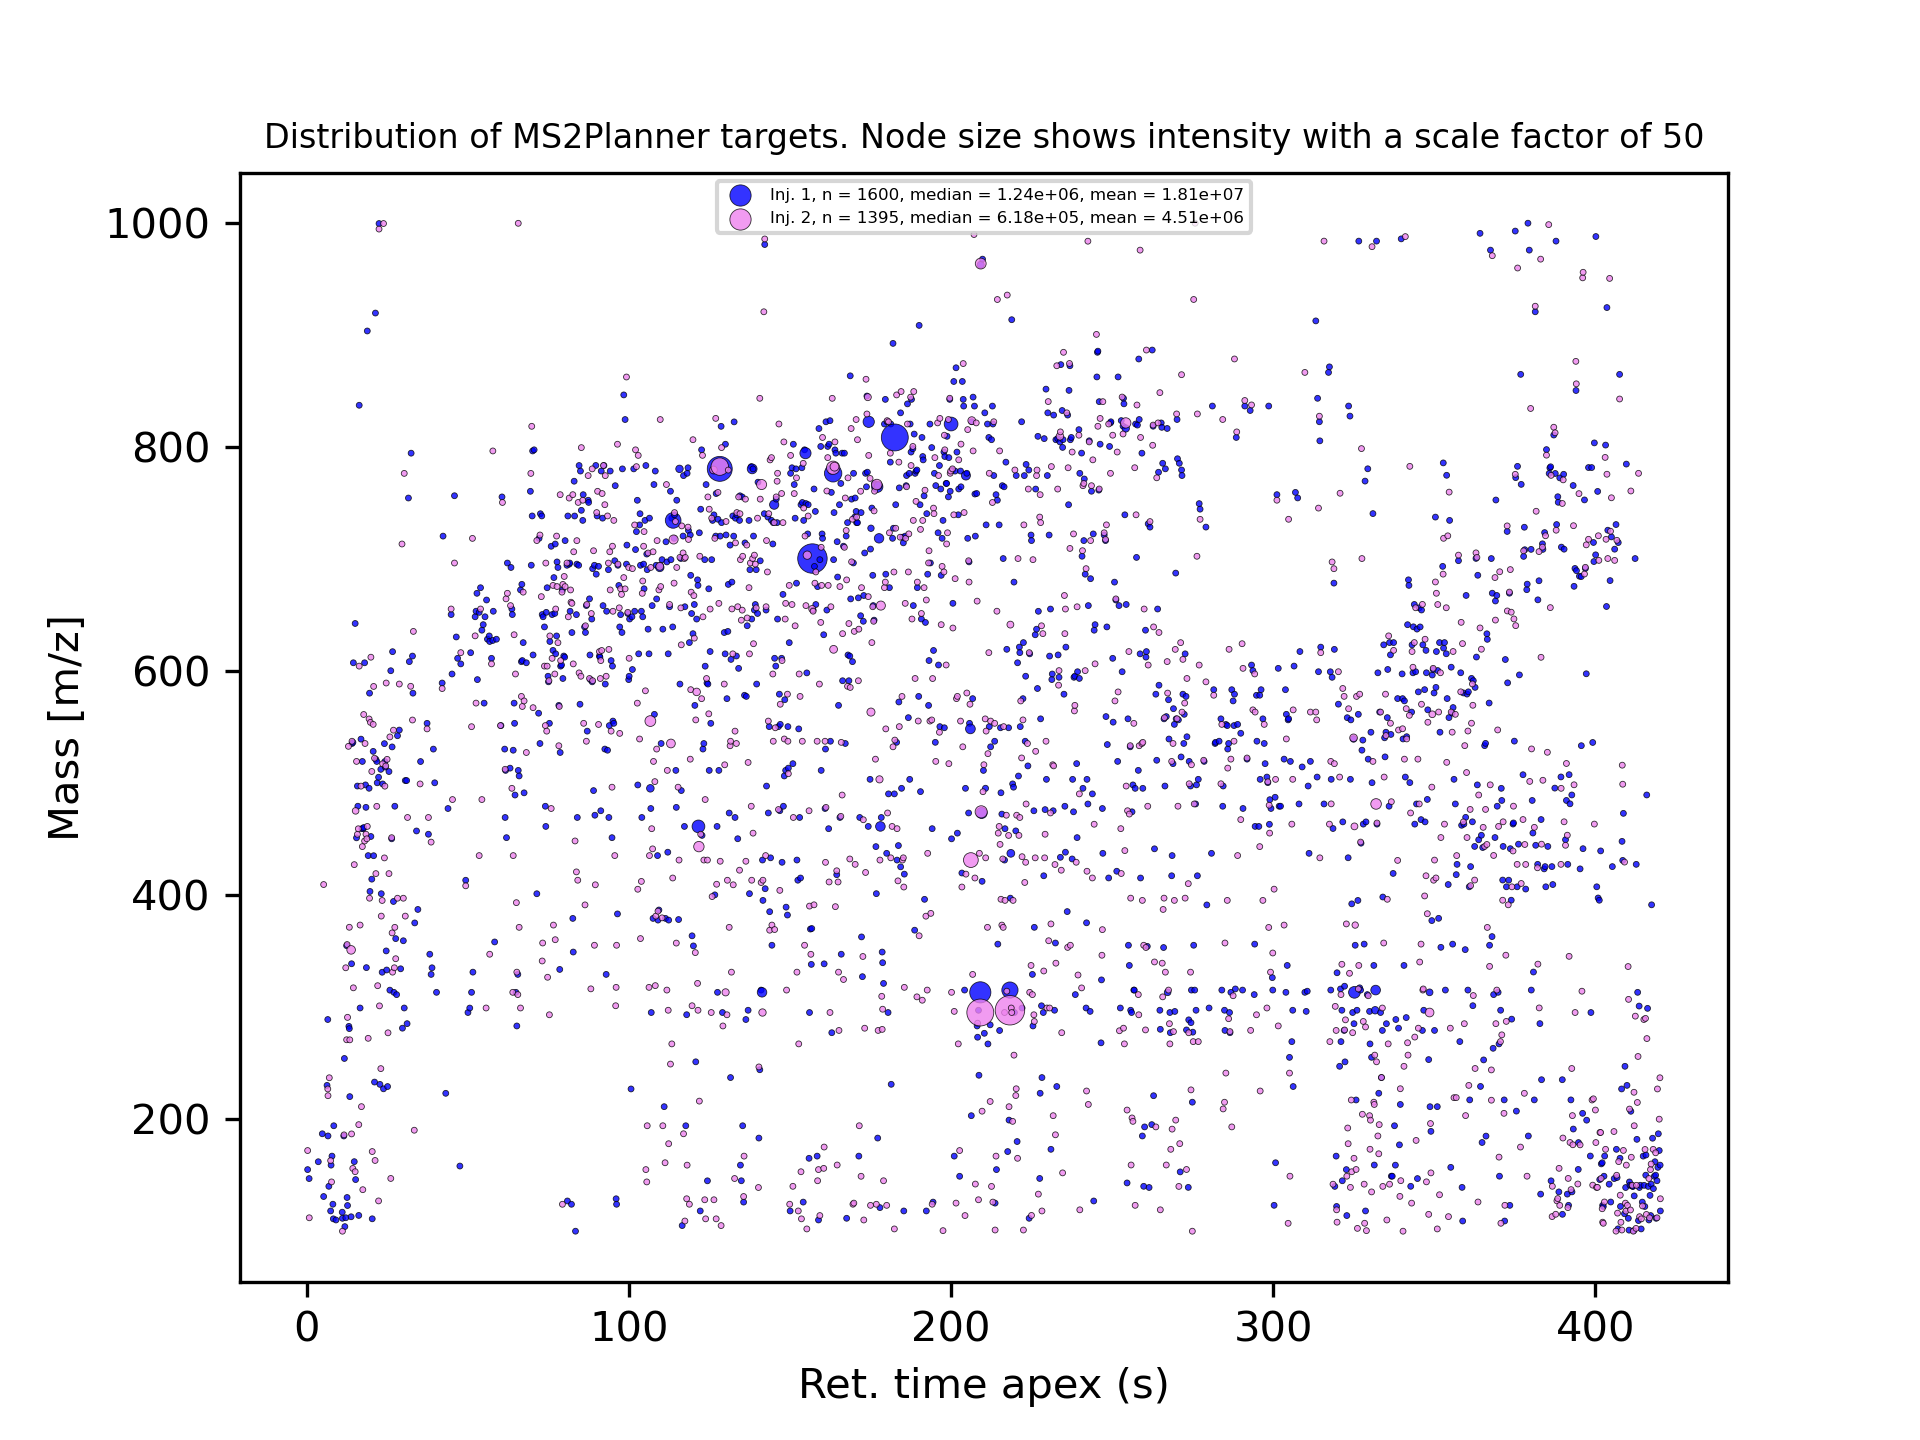

In [10]:
#### RT | m/z
filename = glob.glob('results_targeted_MS2Planner_baseline/plots/*_ALL_plot_mz_rt.png')
Image(filename[0])

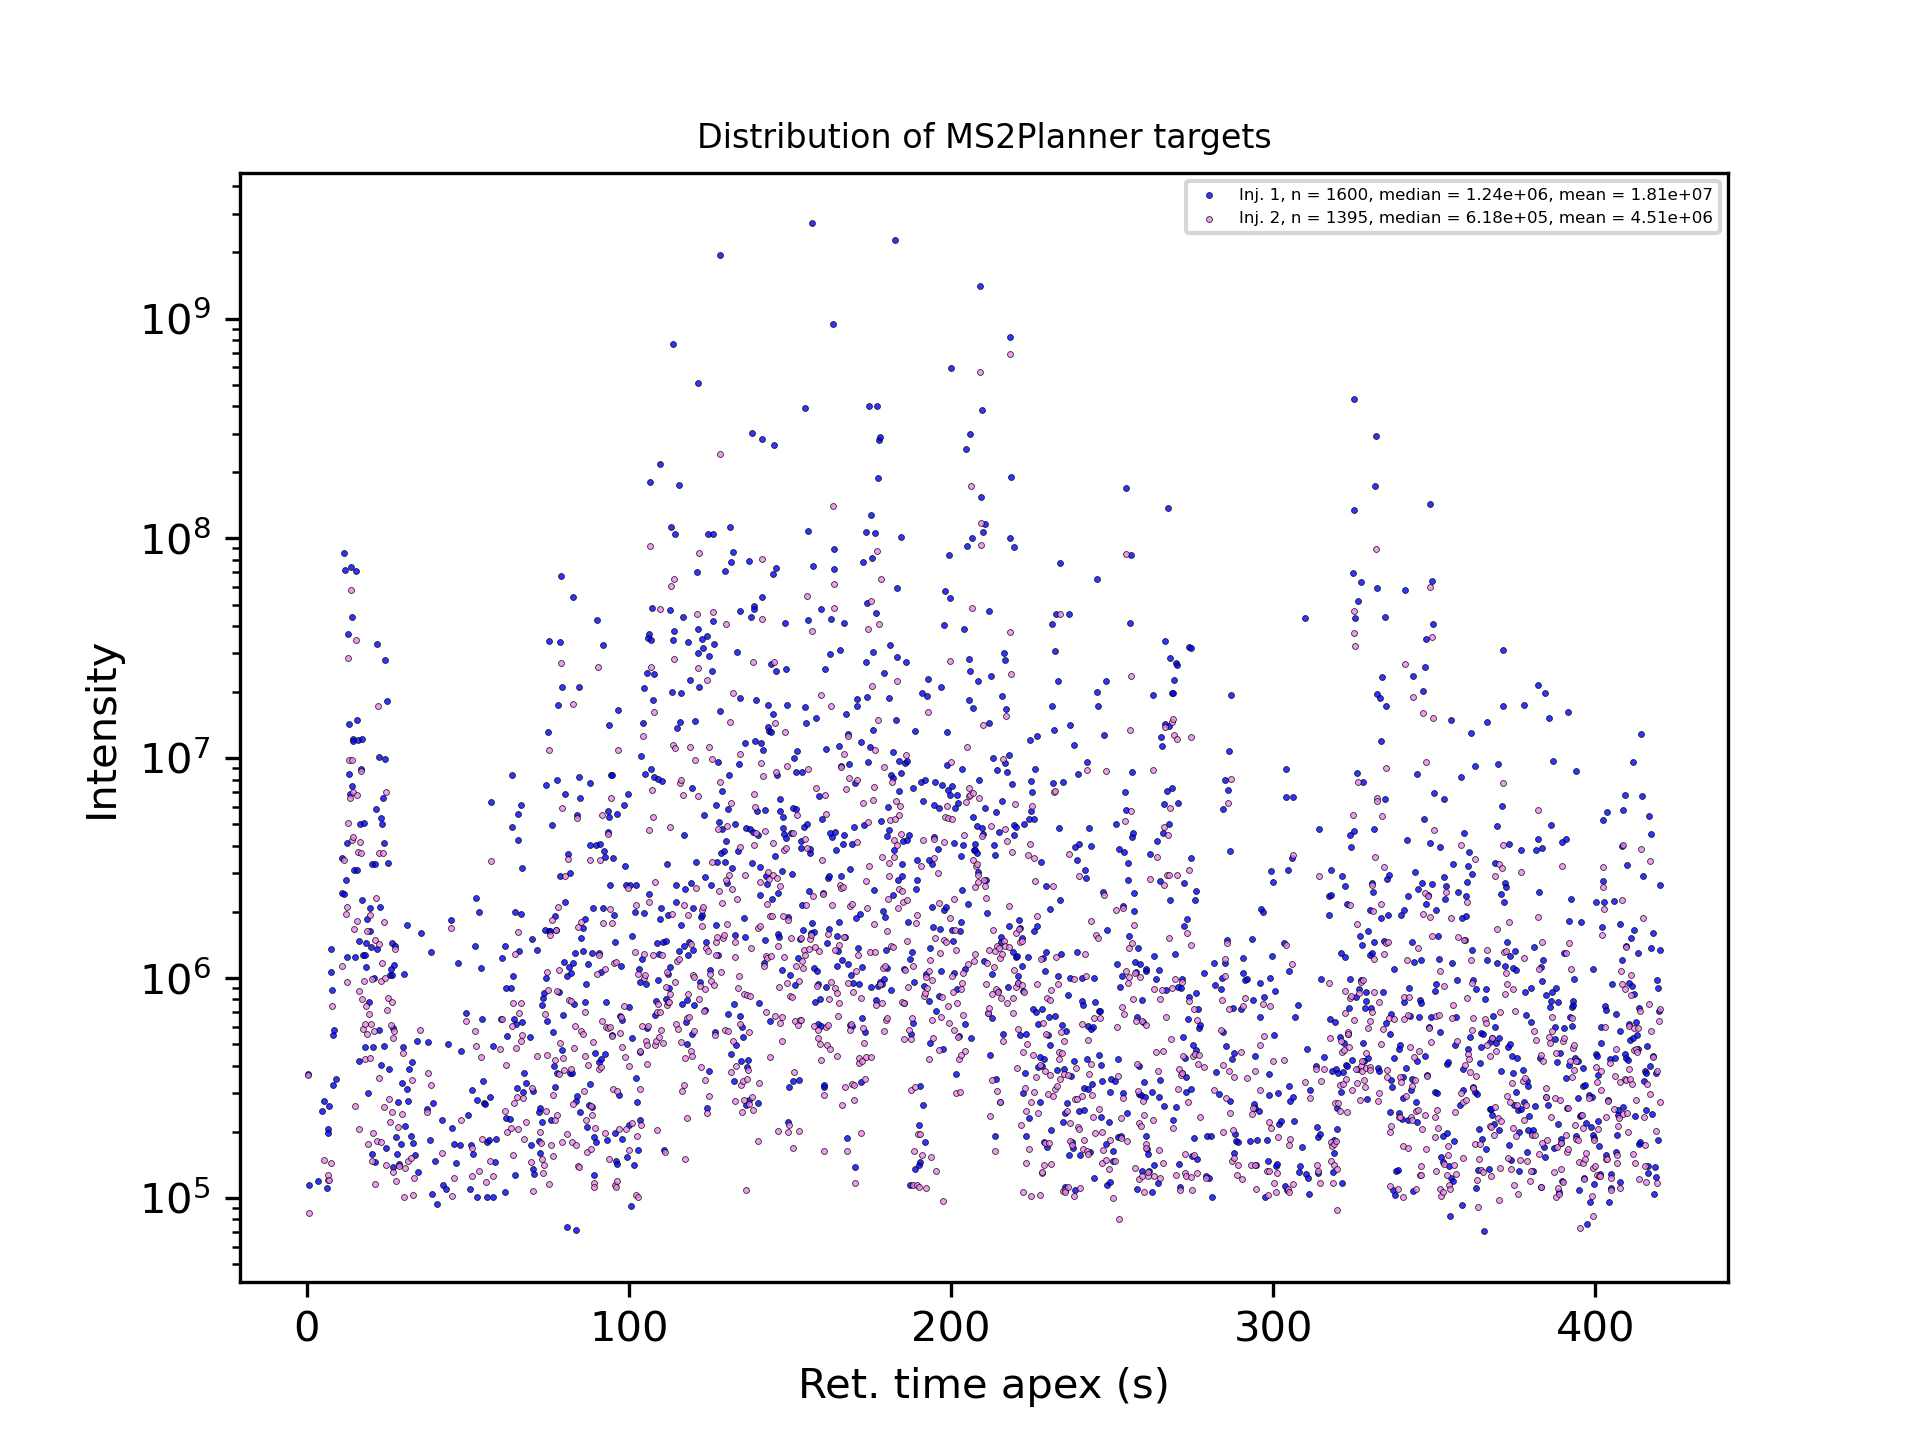

In [11]:
#### RT | int
filename = glob.glob('results_targeted_MS2Planner_baseline/plots/*_ALL_plot_rt_int.png')
Image(filename[0])

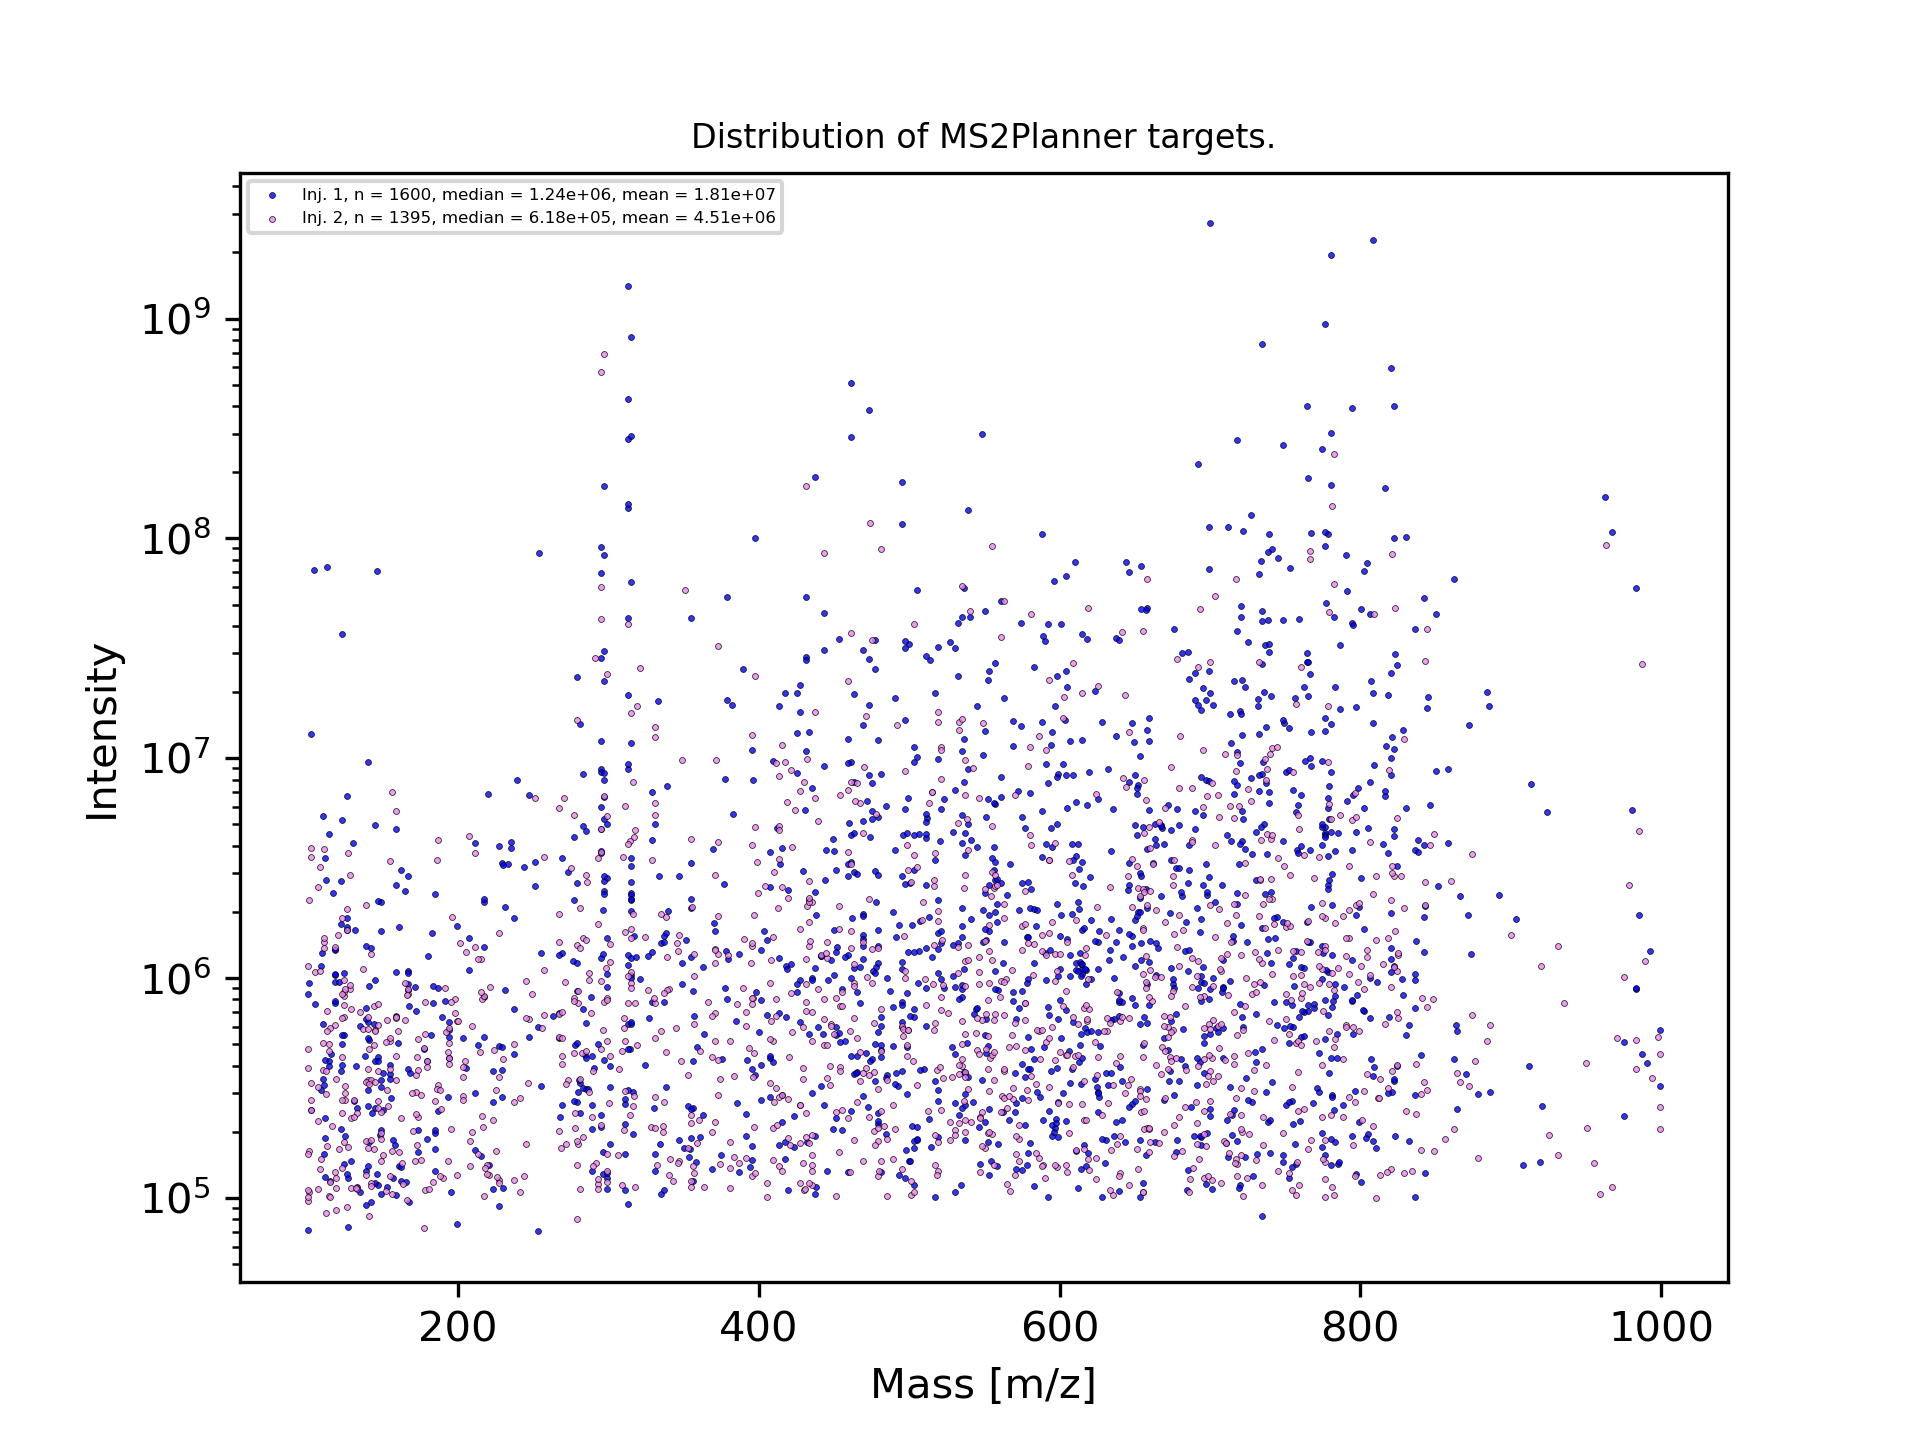

In [12]:
#### m/z | RT
filename = glob.glob('results_targeted_MS2Planner_baseline/plots/*_ALL_plot_mz_int.png')
Image(filename[0])

# MS2Planner in Apex mode

### Prepare Apex mode parameters

In [13]:
# MS2Planner - Shared between Apex and Curve modes
intensity_accumulated = 1E4
min_scan = 0.05
max_scan = 0.2

### Run MS2Planner in Apex mode

This is pretty quick ...

In [14]:
MS2Planner_apex(
    input_file, experiment_number, min_ratio_value, min_intensity_value, 
    intensity_accumulated, isolation, delay, min_scan, max_scan,
    rt_margin, max_same_RT, transient_time,
    polarity,apex_int_percent,pretarget_rt_margin, posttarget_rt_margin,
    RF_base_value=RF_base_value, CEs=CEs,
    min_AGC=min_AGC, max_AGC=max_AGC)

[I 230821 17:32:27 IODA_MS2Planner_workflow:525] STARTING THE MS2Planner WORKFLOW
[I 230821 17:32:27 IODA_MS2Planner_workflow:530] File path to a MZmine3 feature table was specified by the user
[I 230821 17:32:27 IODA_MS2Planner_workflow:545] 2023-08-21 17:32:27.654508
[I 230821 17:32:27 IODA_MS2Planner_workflow:547] ======
[I 230821 17:32:27 IODA_MS2Planner_workflow:548] Getting the mzTab
[I 230821 17:32:27 IODA_MS2Planner_workflow:565] This is the input file path: OpenMS_workflow/OpenMS_output/consensus_MS2Planner.csv
[I 230821 17:32:27 IODA_MS2Planner_workflow:566] This is the output file path: results_targeted_MS2Planner_apex/consensus_MS2Planner.csv
[I 230821 17:32:27 IODA_MS2Planner_workflow:575] ======
[I 230821 17:32:27 IODA_MS2Planner_workflow:576] Converting to intermediate table format ...
[I 230821 17:32:27 IODA_MS2Planner_workflow:123] - For sample Euphorbia_rogers_latex_Blank_MS1_2uL.mzML, the sum of feature intensities = 6.85e+08
[I 230821 17:32:27 IODA_MS2Planner_workfl

[I 230821 17:32:27 IODA_MS2Planner_workflow:578] ======
[I 230821 17:32:27 IODA_MS2Planner_workflow:583] Assumed sample filename: Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 230821 17:32:27 IODA_MS2Planner_workflow:585] Assumed blank filename: Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230821 17:32:27 IODA_MS2Planner_workflow:586] ======
[I 230821 17:32:27 IODA_MS2Planner_workflow:589] = PARAMETERS ==
[I 230821 17:32:27 IODA_MS2Planner_workflow:590]  
[I 230821 17:32:27 IODA_MS2Planner_workflow:591] == MS2Planner parameters
[I 230821 17:32:27 IODA_MS2Planner_workflow:592]  
[I 230821 17:32:27 IODA_MS2Planner_workflow:594]     Ratio between sample/blank for ion filtering = 0
[I 230821 17:32:27 IODA_MS2Planner_workflow:596]     Minimum intensity for ion filtering in sample = 1.00e+04
[I 230821 17:32:27 IODA_MS2Planner_workflow:597]     Precursor ion intensity to accumulate in the MS2 scan = 1.00e+04
[I 230821 17:32:27 IODA_MS2Planner_workflow:598]     Isolation window (m/z) = 1.2
[I 2

Input file is a consensus table from pyOpenMS or provided file


[I 230821 17:32:28 IODA_MS2Planner_workflow:646] ======
[I 230821 17:32:28 IODA_MS2Planner_workflow:650] 2023-08-21 17:32:28,270 - MS2Planner - INFO - =============
    2023-08-21 17:32:28,270 - MS2Planner - INFO - Apex mode begin
    2023-08-21 17:32:28,270 - MS2Planner - INFO - =============
    2023-08-21 17:32:28,270 - MS2Planner - INFO - File Read
    2023-08-21 17:32:28,270 - MS2Planner - INFO - =============
    2023-08-21 17:32:28,271 - MS2Planner.apex - INFO -    Initial number of features = 6188
    2023-08-21 17:32:28,274 - MS2Planner.apex - INFO -    Remaining features = 6188 after same RT filtering with top 3
    2023-08-21 17:32:28,274 - MS2Planner - INFO - Begin Finding Path
    2023-08-21 17:32:28,274 - MS2Planner - INFO - =============
    2023-08-21 17:32:28,338 - MS2Planner.apex - INFO - [1/2 max]: features: 1650, rest: 6189
    2023-08-21 17:32:28,363 - MS2Planner.apex - INFO - [2/2 max]: features: 1361, rest: 4539
    2023-08-21 17:32:28,365 - MS2Planner - INFO - P

### Visualization - **Apex mode results**

### Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the feature detection parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the feature table or the mzTab file (such as with TOPPAS/OpenMS).

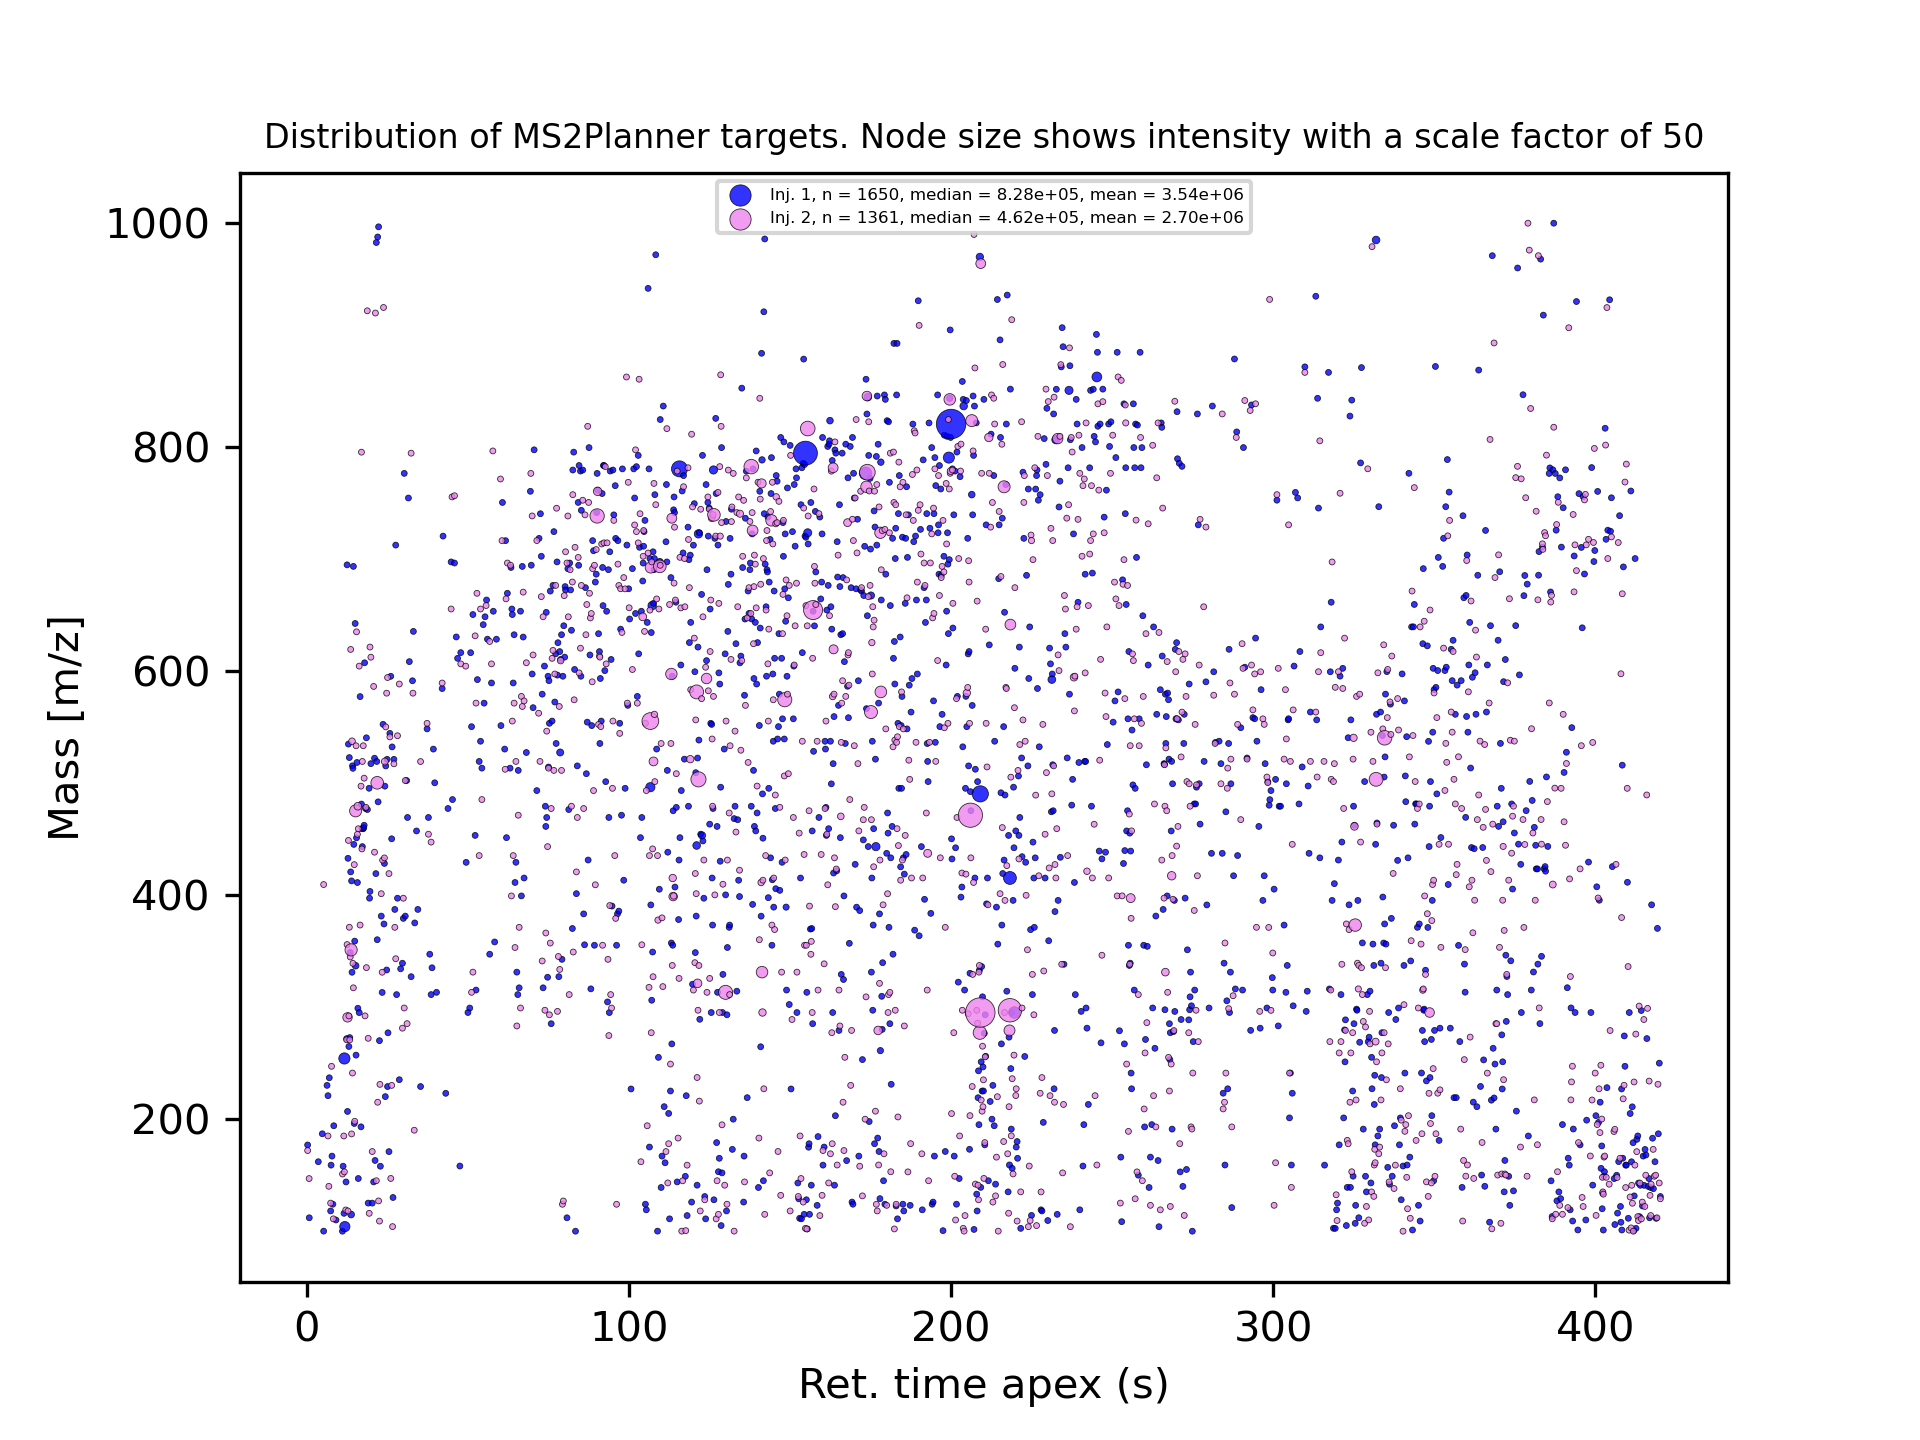

In [15]:
#### RT | m/z
filename = glob.glob('results_targeted_MS2Planner_apex/plots/*_ALL_plot_mz_rt.png')
Image(filename[0])

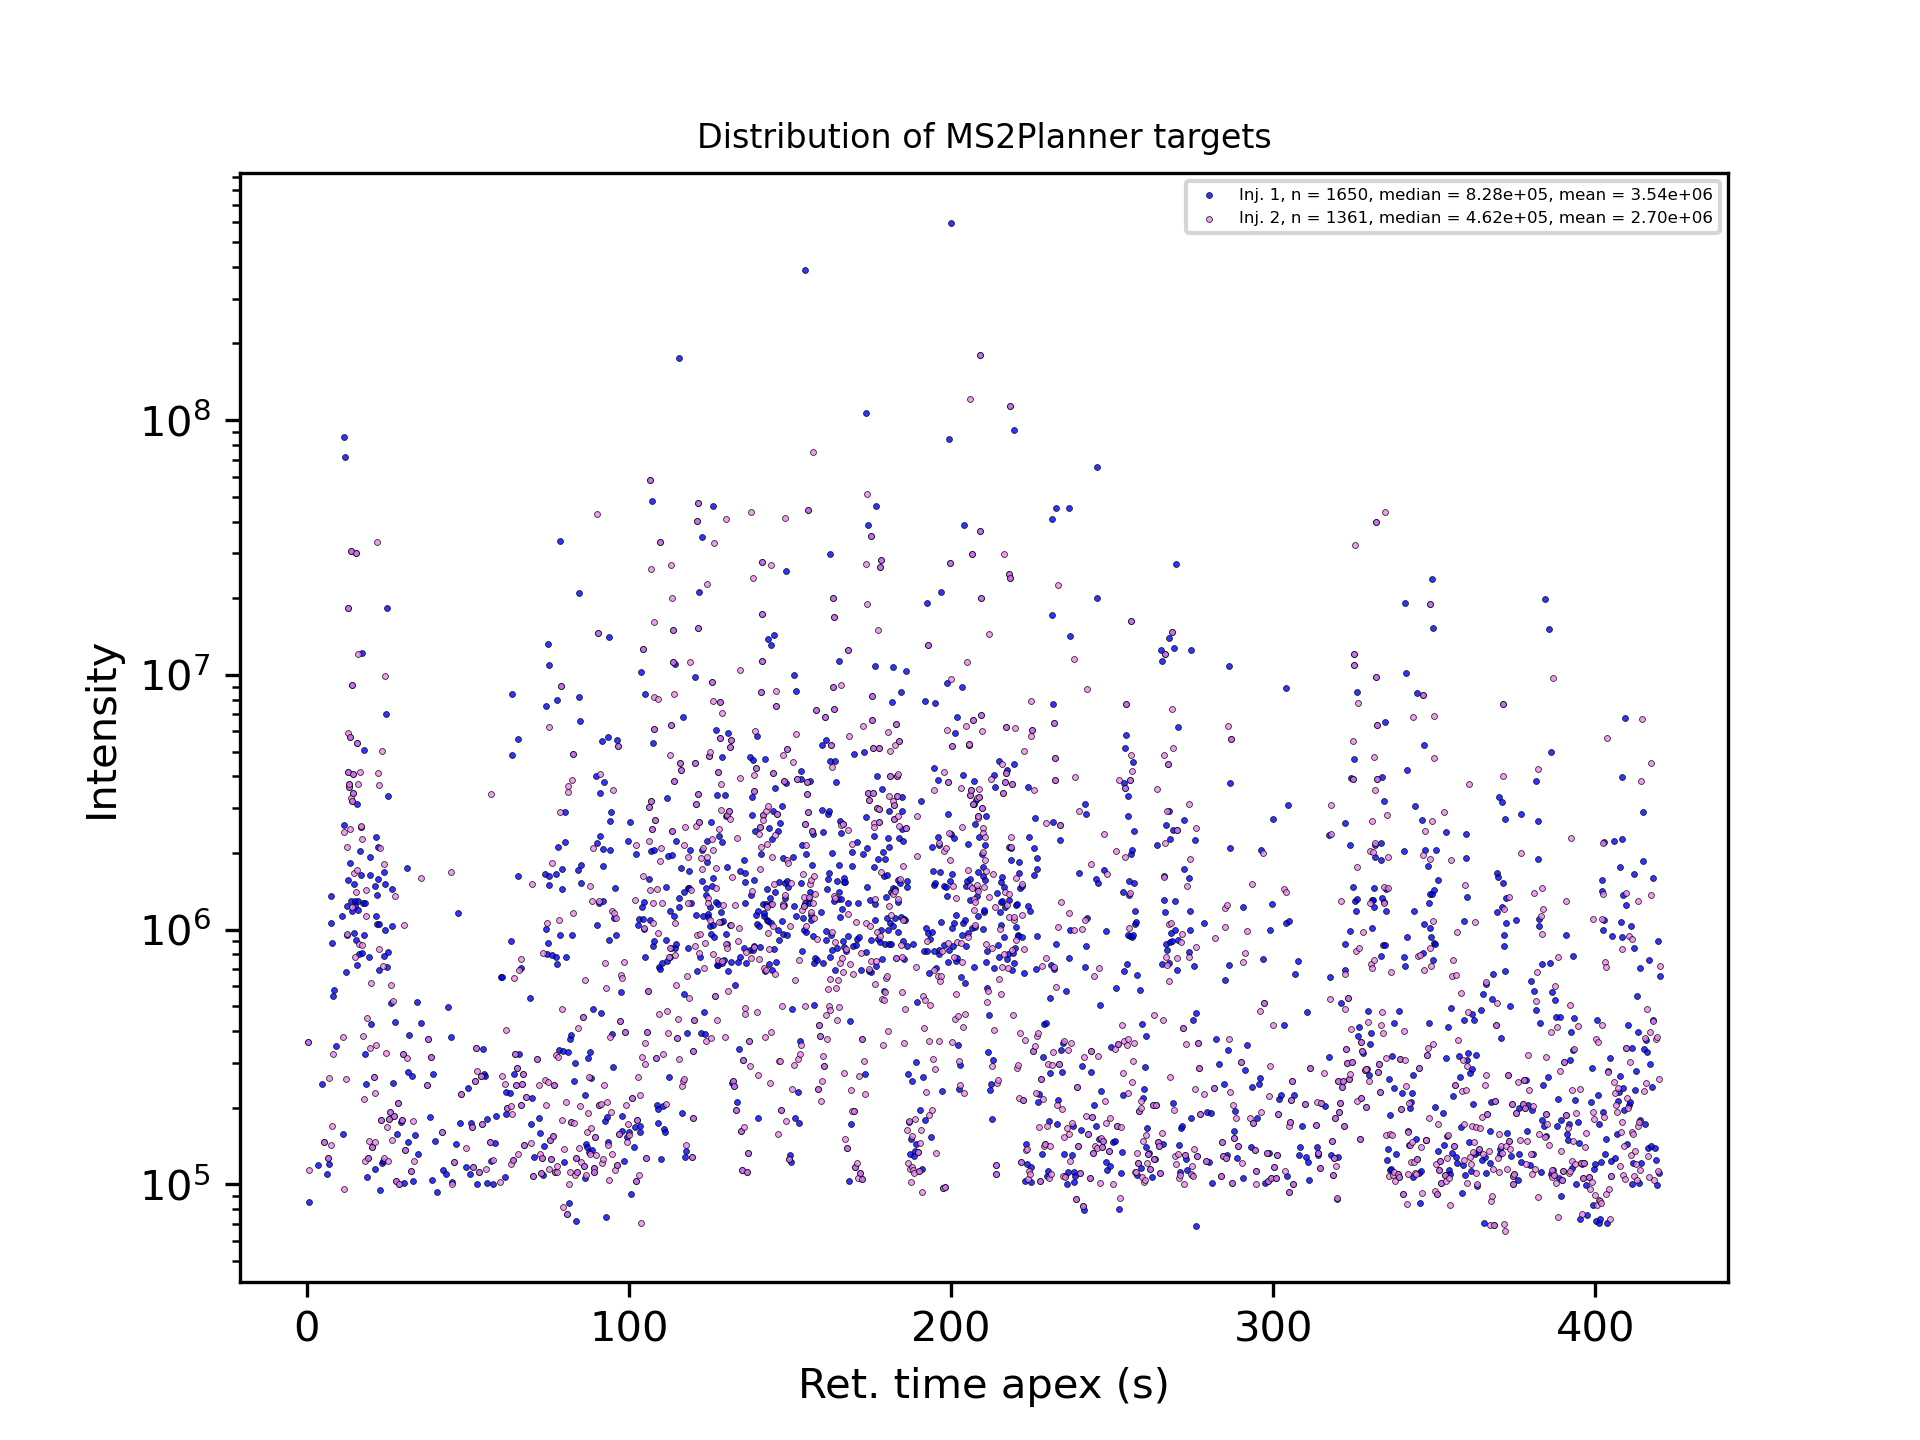

In [16]:
#### RT | int
filename = glob.glob('results_targeted_MS2Planner_apex/plots/*_ALL_plot_rt_int.png')
Image(filename[0])

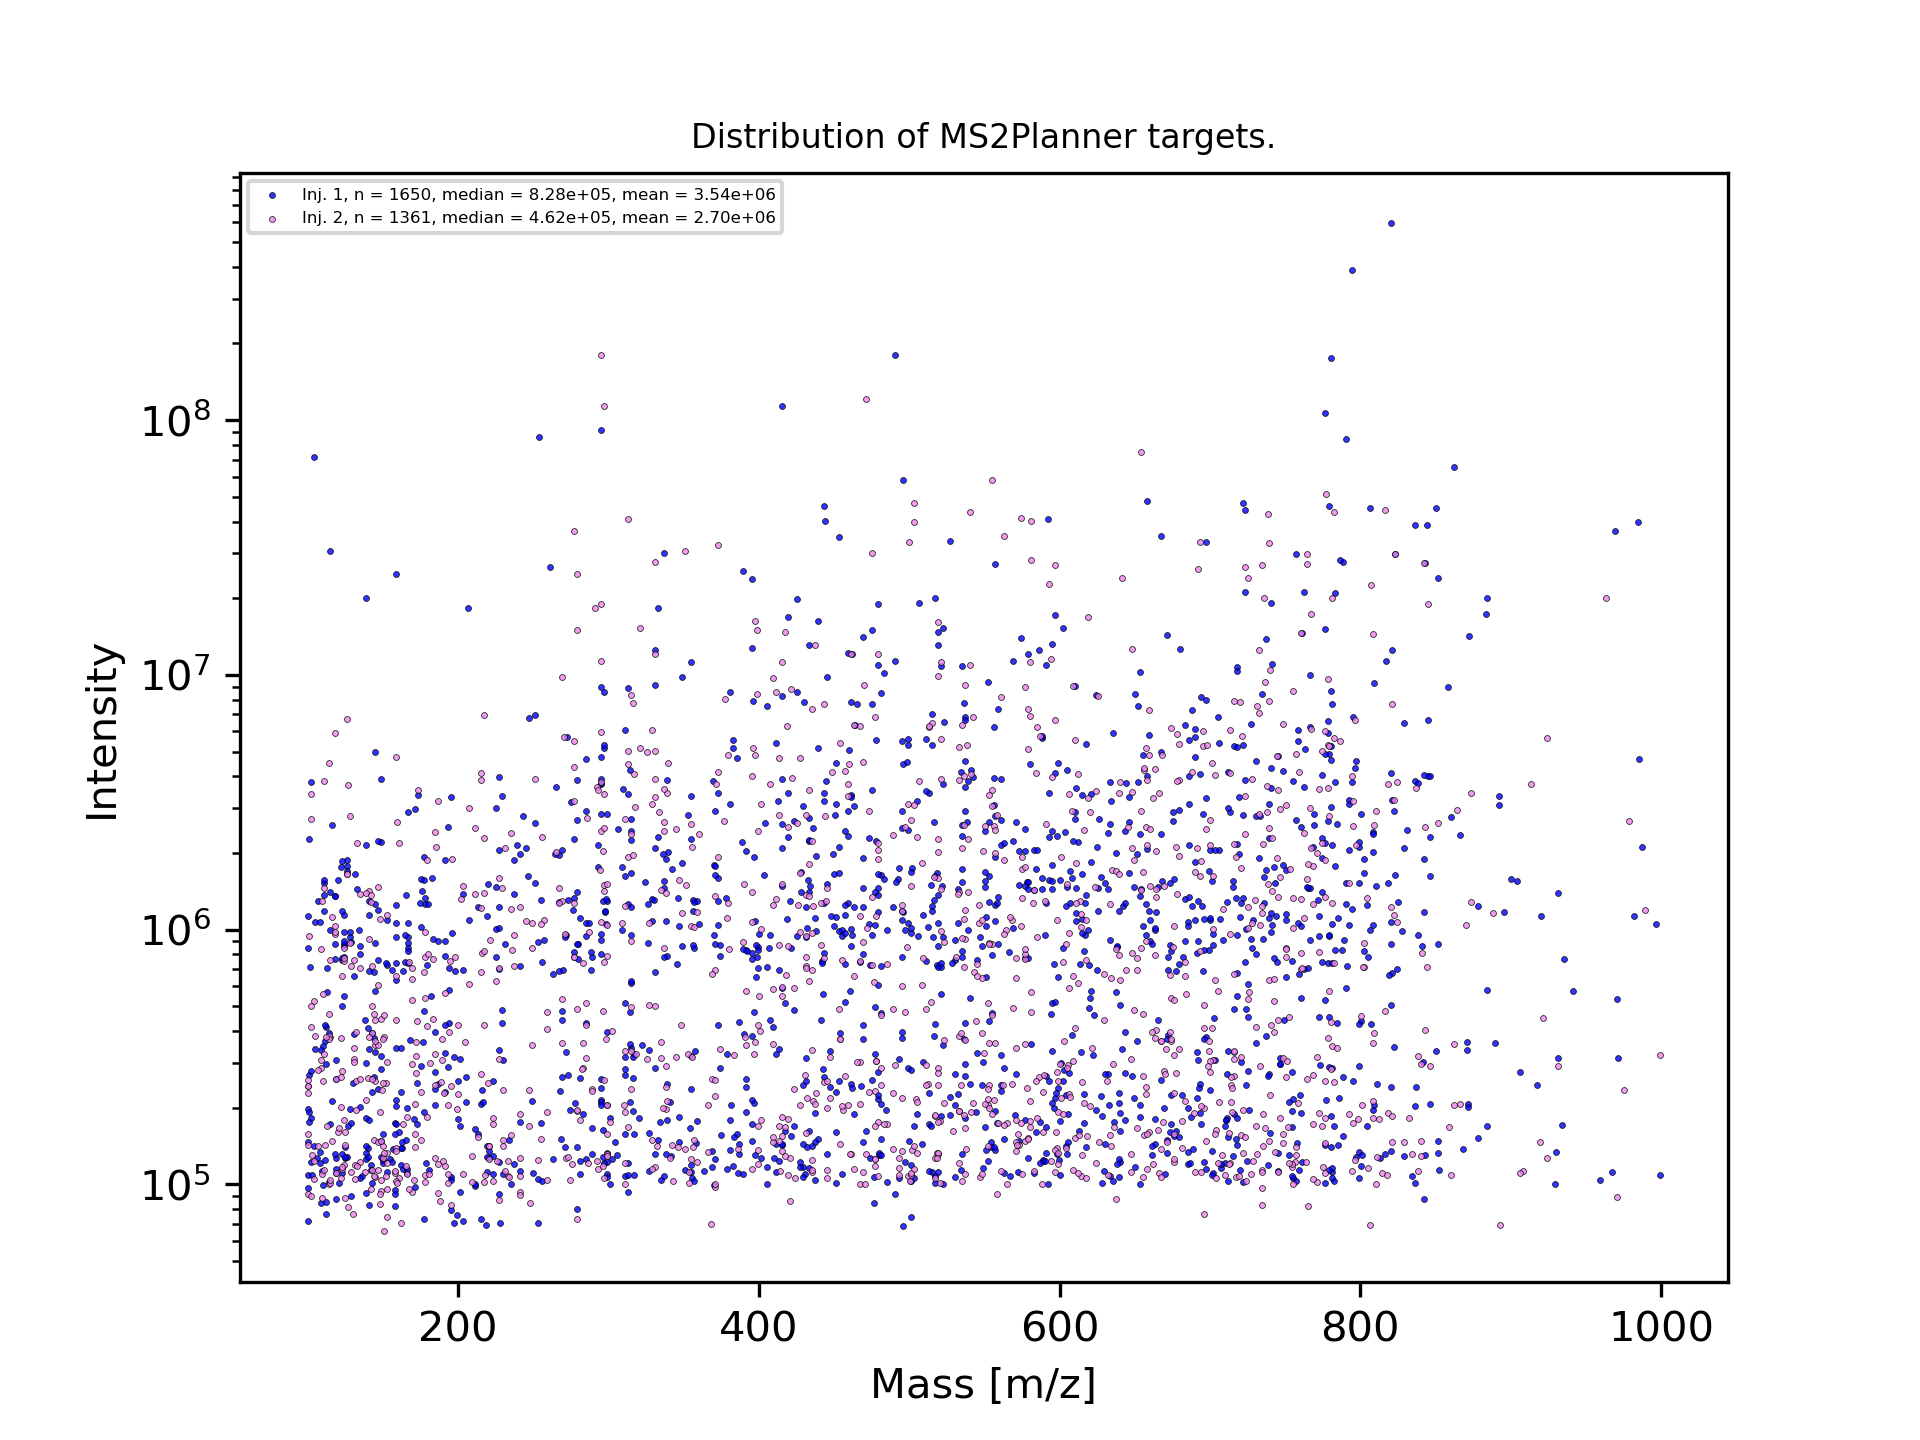

In [17]:
#### m/z | RT
filename = glob.glob('results_targeted_MS2Planner_apex/plots/*_ALL_plot_mz_int.png')
Image(filename[0])

### Download the results

Download the IODA-targeted workflow results ->
[download_results_targeted_MS2Planner_apex/IODA_MS2Planner_curve_apex.zip](download_results_targeted_MS2Planner_apex/IODA_MS2Planner_curve_apex.zip?download=1).

### Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).

# MS2Planner in Curve mode

This mode should be the most the perfomant.

### Prepare Curve mode parameters

In [18]:
#CURVE MODE PARAMETERS
rt_tolerance_curve = 2 #secs
mz_tolerance_curve = 2 #m/z
min_scan = 0.05
max_scan = 0.35
intensity_accumulated = 3e4
restriction = 2
cluster = 'kNN'

### Run MS2Planner in Curve mode

This can take several minutes. The amount of RAM can reach 10-16 GB depending on the number of features and mass spec data.

In [19]:
from IODA_MS2Planner_workflow import *
from IODA_run_pyOpenMS_targeted import *
MS2Planner_curve(input_file, experiment_number, min_ratio_value,
                    min_intensity_value, input_file_curve, 
                    intensity_accumulated, 
                    rt_tolerance_curve, mz_tolerance_curve, 
                    isolation, delay, min_scan, max_scan, cluster, 
                    rt_margin, transient_time, max_same_RT, 
                    apex_int_percent, polarity, 
                    pretarget_rt_margin, posttarget_rt_margin,
                    RF_base_value=RF_base_value, CEs=CEs,
                    min_AGC=min_AGC, max_AGC=max_AGC
                    )

[I 230821 17:32:30 IODA_MS2Planner_workflow:730] STARTING THE MS2Planner WORKFLOW
[I 230821 17:32:30 IODA_MS2Planner_workflow:735] File path to a MZmine3 feature table was specified by the user
[I 230821 17:32:30 IODA_MS2Planner_workflow:750] 2023-08-21 17:32:30.493082
[I 230821 17:32:30 IODA_MS2Planner_workflow:752] ======
[I 230821 17:32:30 IODA_MS2Planner_workflow:753] Getting the mzTab
[I 230821 17:32:30 IODA_MS2Planner_workflow:770] This is the input file path: OpenMS_workflow/OpenMS_output/consensus_MS2Planner.csv
[I 230821 17:32:30 IODA_MS2Planner_workflow:771] This is the output file path: results_targeted_MS2Planner_curve/consensus_MS2Planner.csv
[I 230821 17:32:30 IODA_MS2Planner_workflow:780] ======
[I 230821 17:32:30 IODA_MS2Planner_workflow:781] Converting to intermediate table format ...
[I 230821 17:32:30 IODA_MS2Planner_workflow:123] - For sample Euphorbia_rogers_latex_Blank_MS1_2uL.mzML, the sum of feature intensities = 6.85e+08
[I 230821 17:32:30 IODA_MS2Planner_workf

[I 230821 17:32:30 IODA_MS2Planner_workflow:783] ======
[I 230821 17:32:30 IODA_MS2Planner_workflow:788] Assumed sample filename: Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 230821 17:32:30 IODA_MS2Planner_workflow:790] Assumed blank filename: Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230821 17:32:30 IODA_MS2Planner_workflow:791] ======
[I 230821 17:32:30 IODA_MS2Planner_workflow:794] = PARAMETERS ==
[I 230821 17:32:30 IODA_MS2Planner_workflow:795]  
[I 230821 17:32:30 IODA_MS2Planner_workflow:796] == MS2Planner parameters
[I 230821 17:32:30 IODA_MS2Planner_workflow:798]     Ratio between sample/blank for ion filtering = 0
[I 230821 17:32:30 IODA_MS2Planner_workflow:800]     Minimum intensity for ion filtering in sample = 1.00e+04
[I 230821 17:32:30 IODA_MS2Planner_workflow:801]     Precursor ion intensity to accumulate in the MS2 scan = 3.00e+04
[I 230821 17:32:30 IODA_MS2Planner_workflow:802]     Input file for curve data : tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_l

Input file is a consensus table from pyOpenMS or provided file
Number of features before filter: 6188
Number of features after same_max_RT filter: 6188
Start GenPath for each path
====== New path processed
EdgeCreate
AddPrimeNode
addEdge
shortestPath
PathExtraction
ClusterRemove
====== New path processed
EdgeCreate
AddPrimeNode
addEdge
shortestPath
PathExtraction
ClusterRemove


[I 230821 17:38:25 IODA_MS2Planner_workflow:857] ======
[I 230821 17:38:25 IODA_MS2Planner_workflow:861] 2023-08-21 17:32:31,074 - MS2Planner - INFO - =============
    2023-08-21 17:32:31,074 - MS2Planner - INFO - Curve mode begin
    2023-08-21 17:32:31,074 - MS2Planner - INFO - restriction: (2.0000, 2.0000)
    2023-08-21 17:32:34,468 - MS2Planner.curve - INFO - =============
    2023-08-21 17:32:34,468 - MS2Planner.curve - INFO - File Read
    2023-08-21 17:32:34,468 - MS2Planner.curve - INFO - =============
    2023-08-21 17:33:22,803 - MS2Planner.curve - INFO - Begin Finding Path
    2023-08-21 17:33:22,803 - MS2Planner.curve - INFO - =============
    2023-08-21 17:36:32,276 - MS2Planner.curve - INFO - [1/2]: features: 1458, rest: 6187
    2023-08-21 17:38:24,603 - MS2Planner.curve - INFO - [2/2]: features: 1309, rest: 4729
    2023-08-21 17:38:25,408 - MS2Planner - INFO - File Written
    2023-08-21 17:38:25,408 - MS2Planner - INFO - =============
    
[I 230821 17:38:25 IODA_M

### Visualization - **Curve mode results**

### Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the feature detection parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the feature table or the mzTab file (such as with TOPPAS/OpenMS).

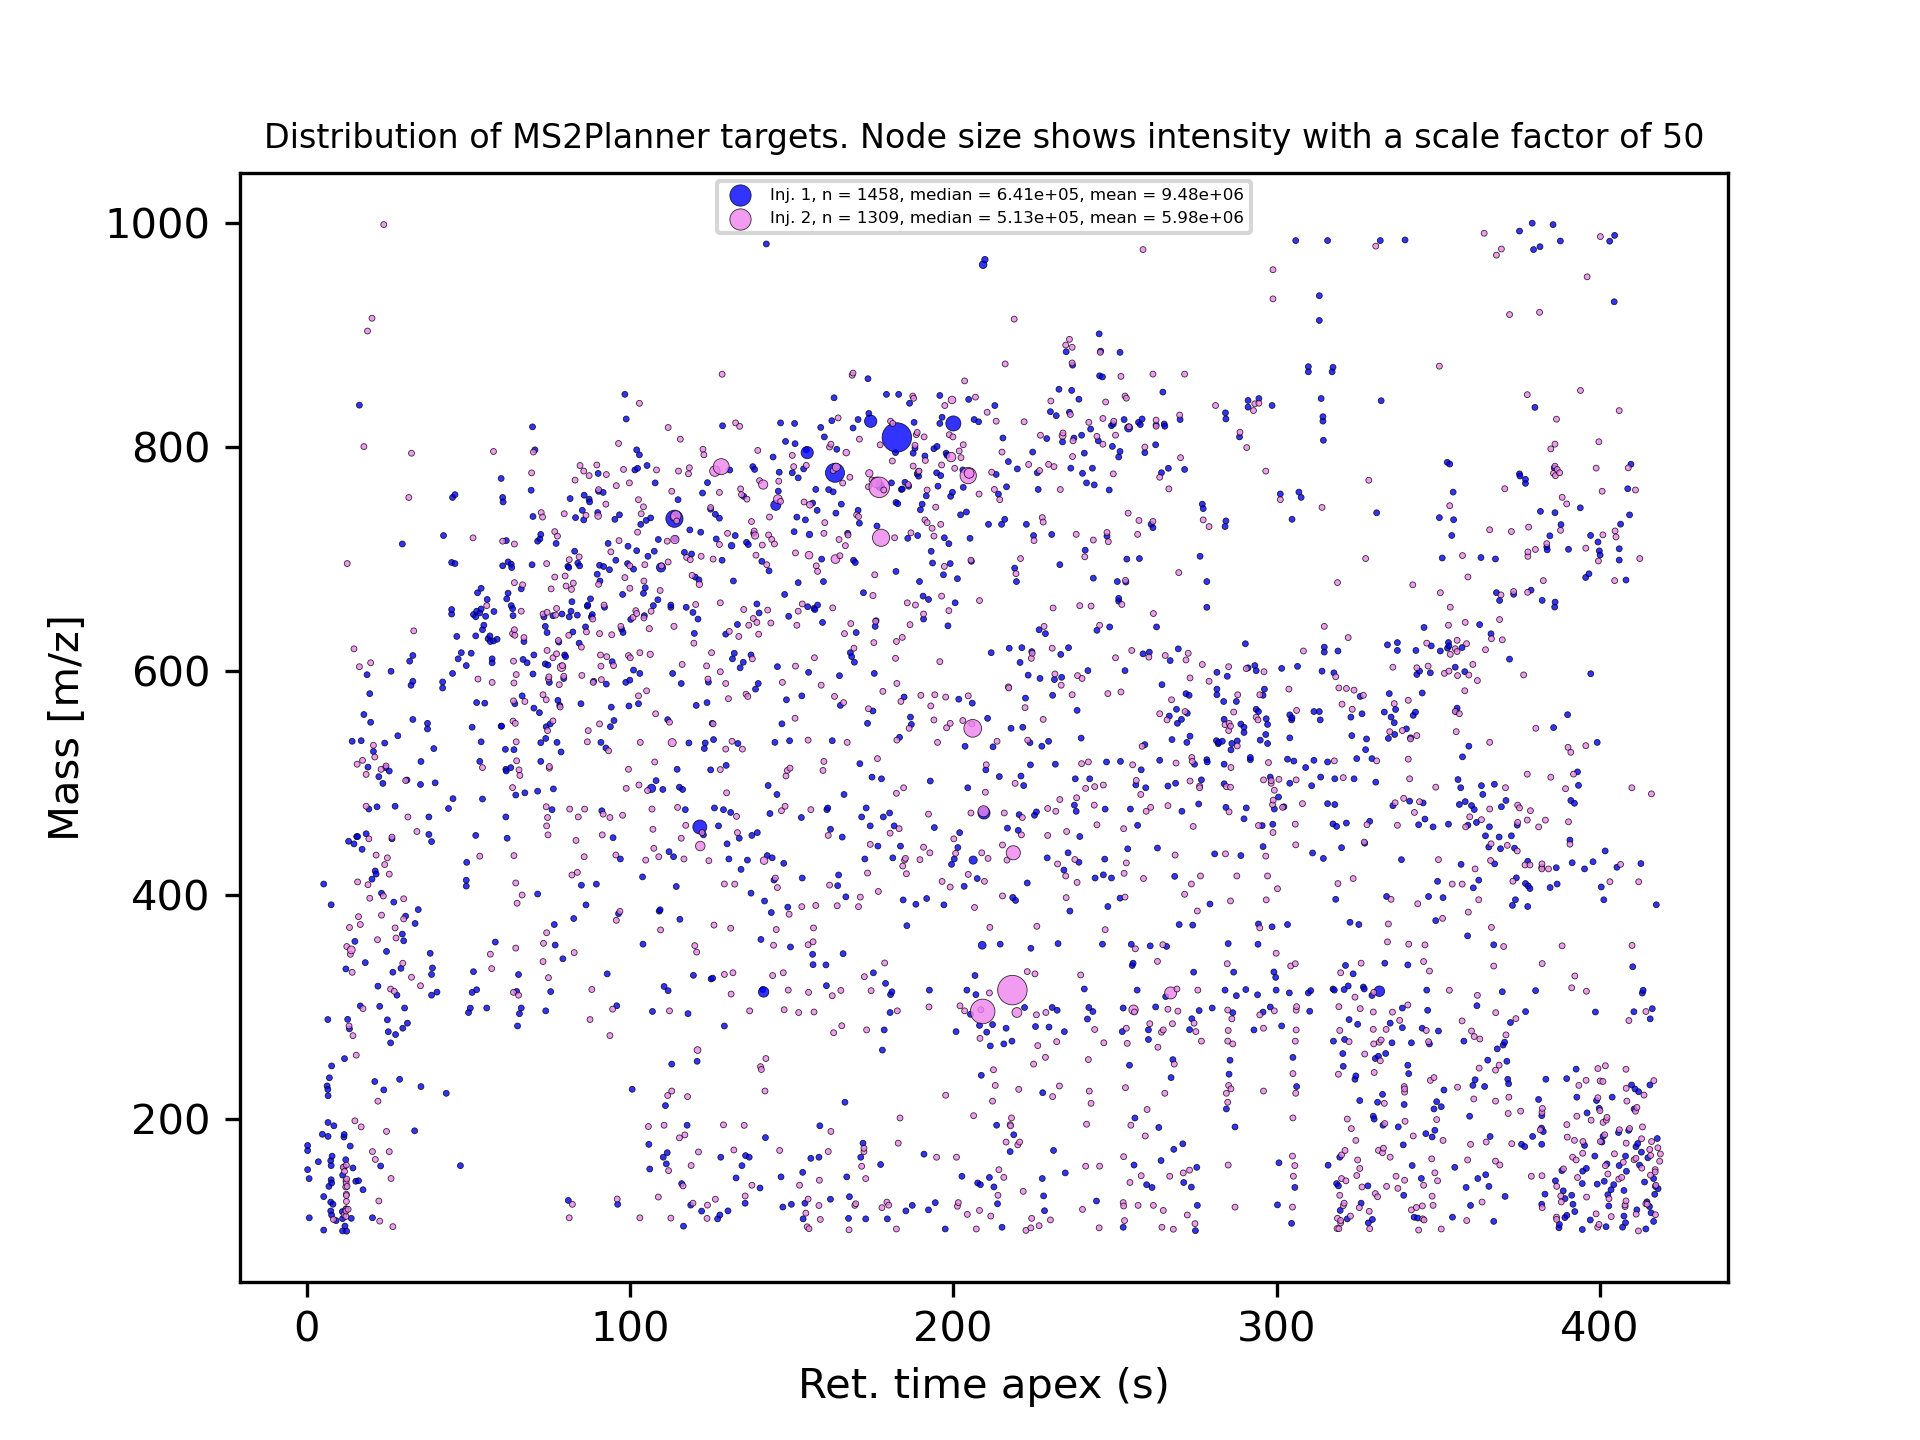

In [20]:
#### RT | m/z
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_mz_rt.png')
Image(filename[0])

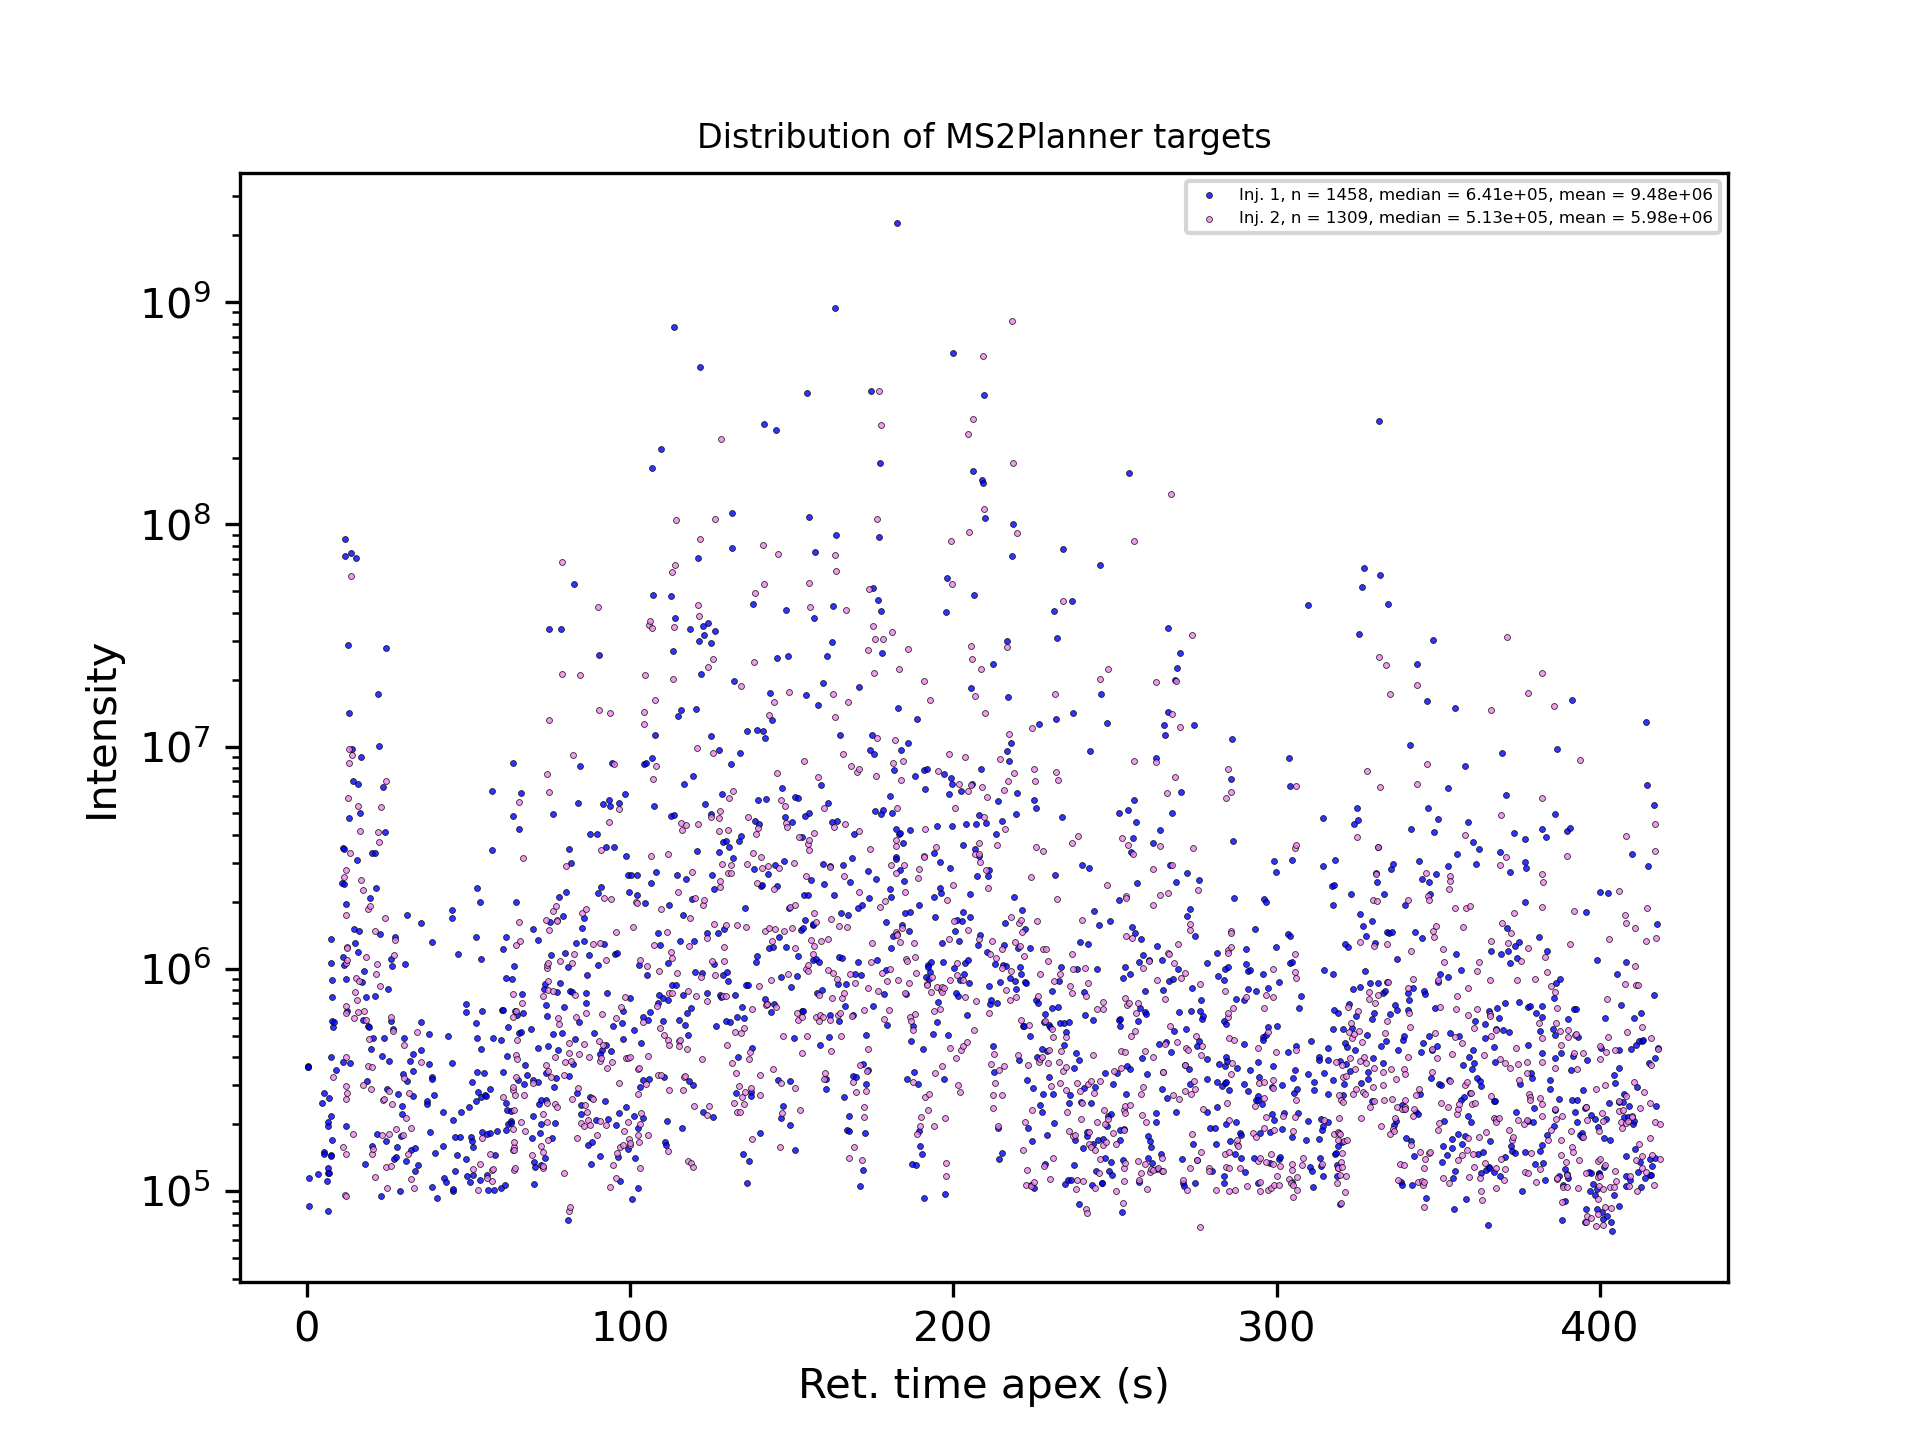

In [21]:
#### RT | int
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_rt_int.png')
Image(filename[0])

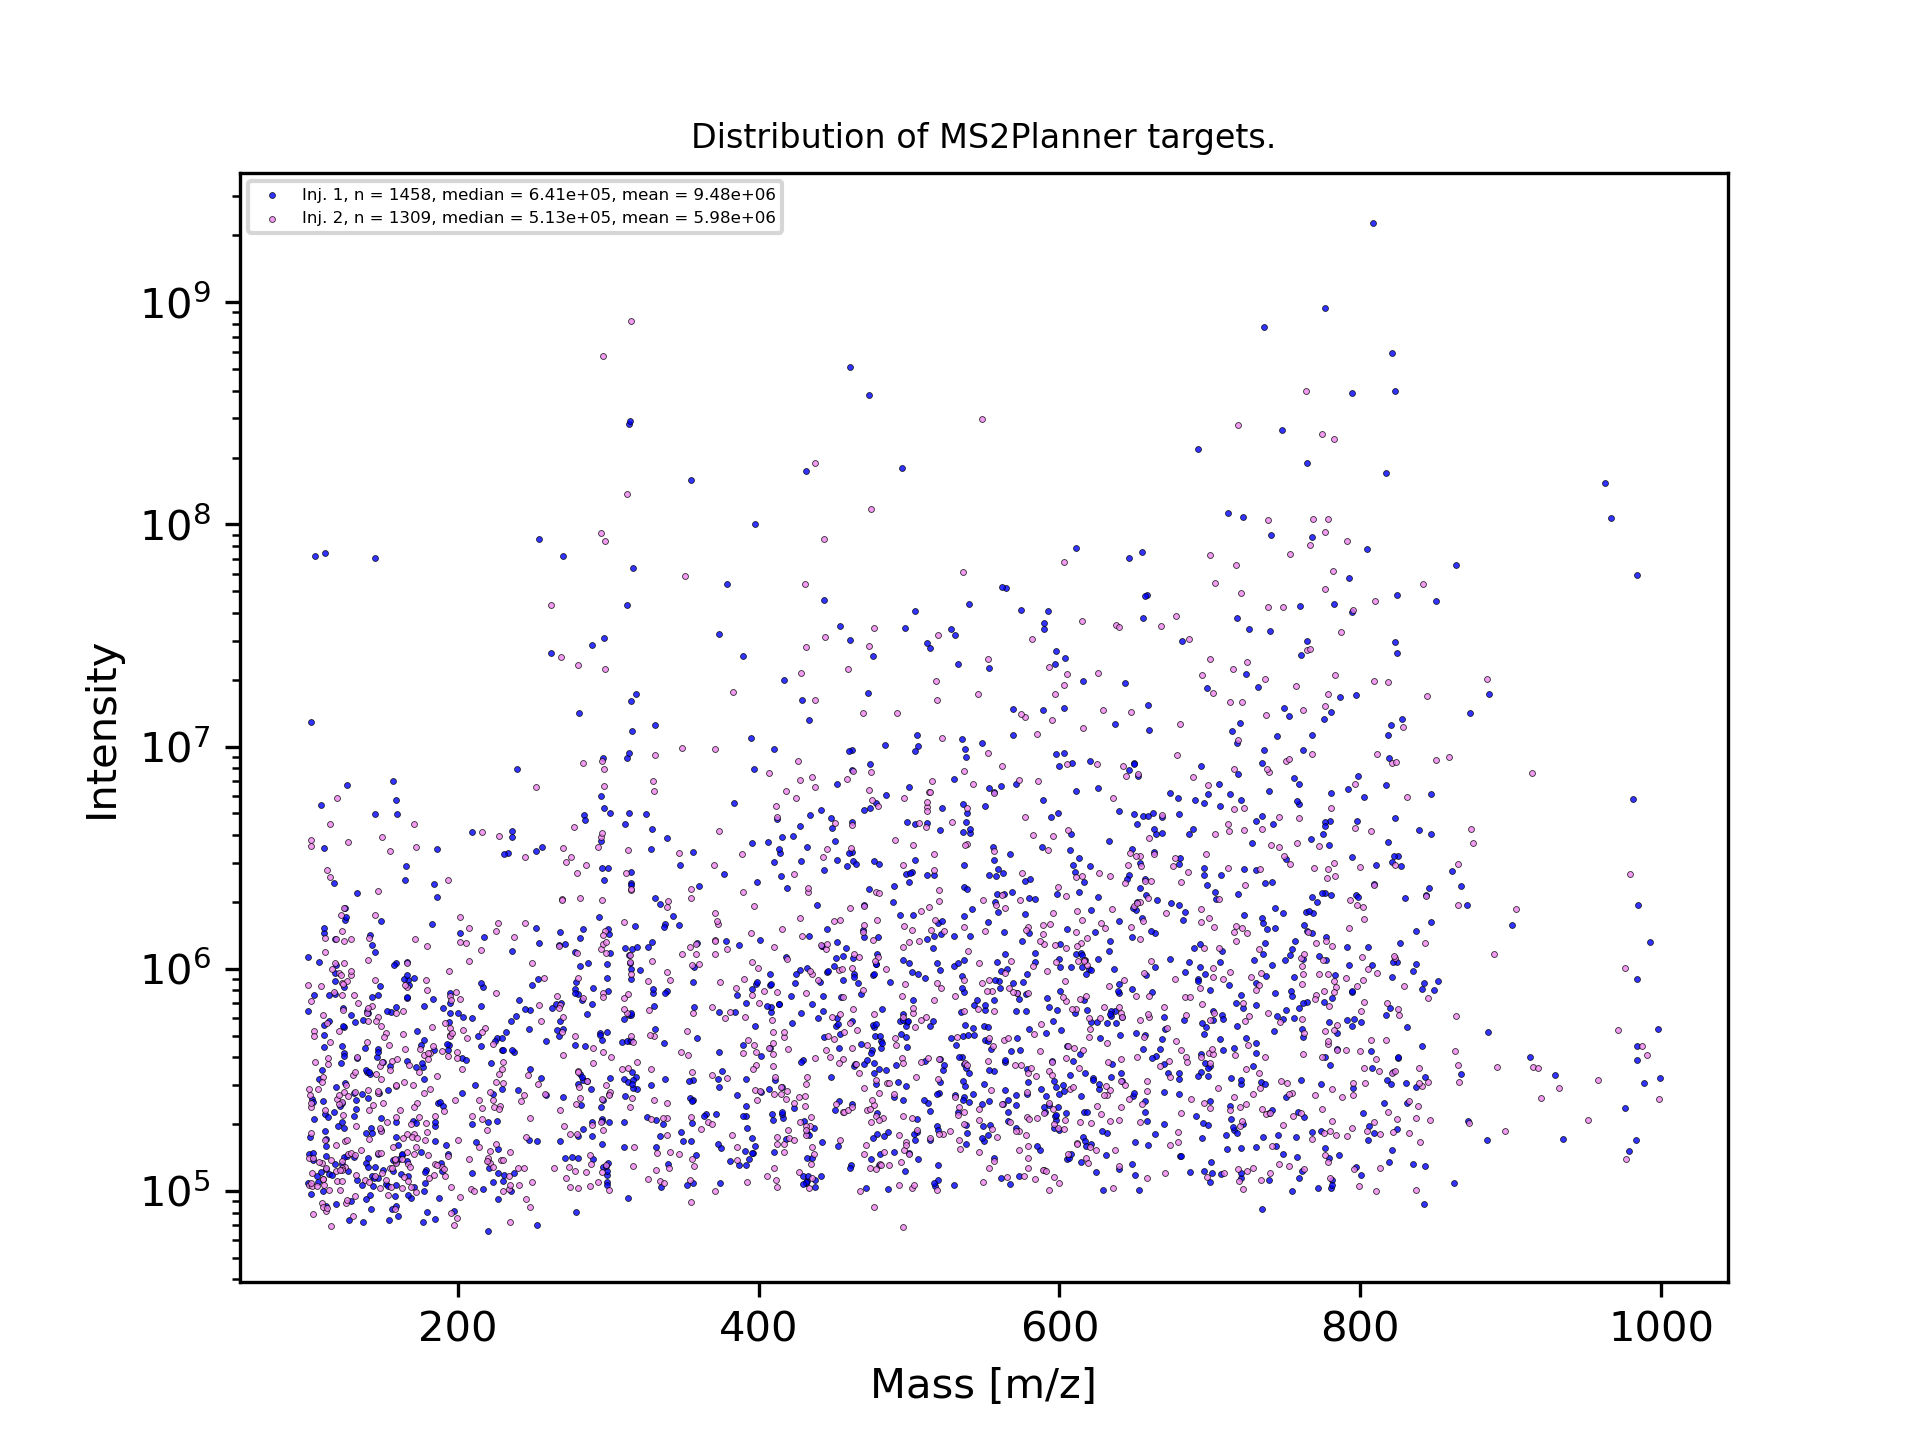

In [22]:
#### m/z | RT
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_mz_int.png')
Image(filename[0])

### Download the results

Download the IODA-targeted workflow results ->
[download_results_targeted_MS2Planner_curve/IODA_MS2Planner_curve_results.zip](download_results_targeted_MS2Planner_curve/IODA_MS2Planner_curve_results.zip.zip?download=1).

### Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).